In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import scipy as sp

In [3]:
#Straddle fiyatı
def cal_straddle(vol = 0.2, time=1.0):
    return 2.*((1./np.sqrt(2*np.pi)))*vol*np.sqrt(time)

In [4]:
print( cal_straddle( time=1.0, vol=0.2 ) )

0.1595769121605731


In [5]:
help(np.prod)

Help on function prod in module numpy:

prod(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)
    Return the product of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a product is performed.  The default,
        axis=None, will calculate the product of all the elements in the
        input array. If axis is negative it counts from the last to the
        first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a product is performed on all of the
        axes specified in the tuple instead of a single axis or all the
        axes as before.
    dtype : dtype, optional
        The type of the returned array, as well as of the accumulator in
        which the elements are multiplied.  The dtype of `a` is used by
        default unless `a` has an integer dtype of less 

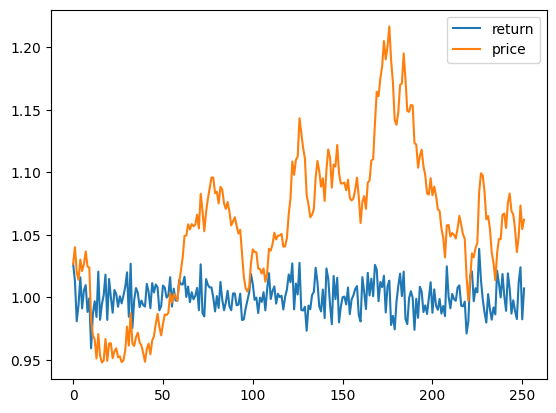

In [6]:
from perspective import attribute_types
def straddlePricerMC(vol = 0.2, time = 1.0, mcPaths = 100):
    time = 1
    nDays = time * 252
    dailyVol = vol / np.sqrt( 252. ) # guarantee the same result from the two random series
    np.random.seed(42)
    returns = np.random.normal( 0, dailyVol, nDays )
    priceAtMaturity = np.prod( 1 + returns )
    changeAtMaturity = priceAtMaturity - 1
    absChangeAtMaturity = np.abs( changeAtMaturity )
    simulatedAsset = pd.DataFrame( np.random.normal( 0, dailyVol, nDays ) + 1, columns=['return'] )
    simulatedAsset['price'] = ( 1 * simulatedAsset['return'] ).cumprod()
    simulatedAsset.plot()
    



straddlePricerMC()

1 path: None
2000 path: None
5000 path: None
10000 path: None
100000 path: None
Closed form approximation: 0.1595769121605731


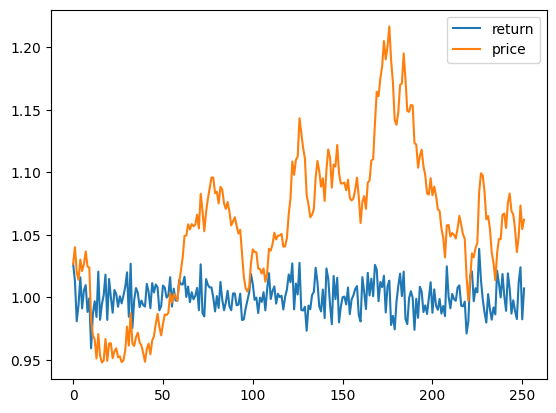

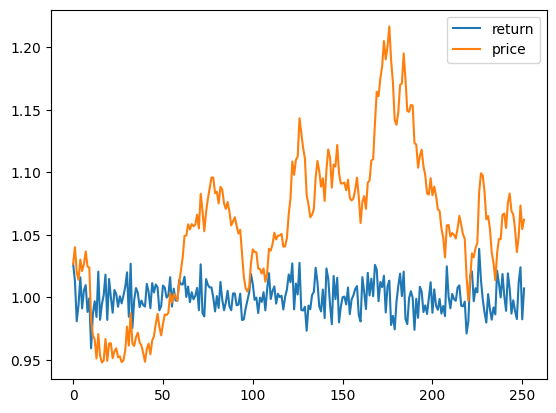

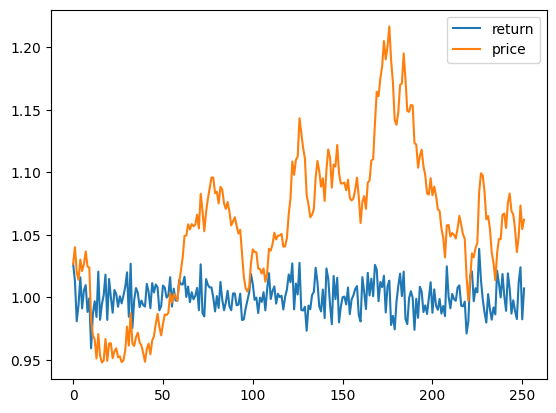

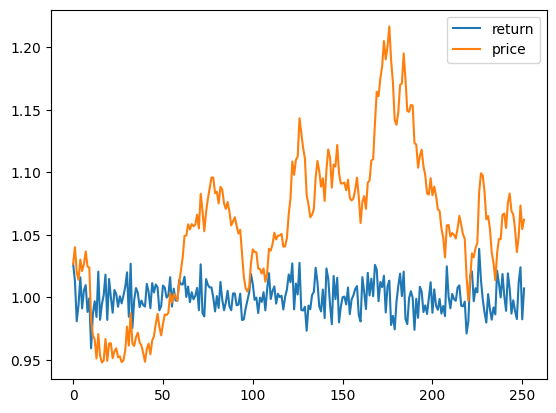

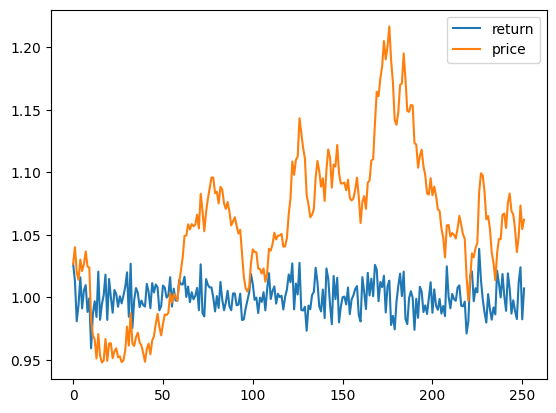

In [7]:
print(f"1 path: {straddlePricerMC(mcPaths=1)}")
print(f"2000 path: {straddlePricerMC(mcPaths=2000)}")
print(f"5000 path: {straddlePricerMC(mcPaths=5000)}")
print(f"10000 path: {straddlePricerMC(mcPaths=10000)}")
print(f"100000 path: {straddlePricerMC(mcPaths=100000)}")
print(f"Closed form approximation: {cal_straddle()}")

In [8]:
def straddlePricerMCWithPD(vol=0.2, time=1, mcPaths=100000):
    dailyVol = vol / ( 252 ** 0.5 )
    randomPaths = pd.DataFrame( np.random.normal( 0, dailyVol, ( time*252, mcPaths ) ) )
    price = ( ( 1 + randomPaths ).prod() - 1 ).abs().sum() / mcPaths
    return price

straddlePricerMCWithPD()

0.15915488262208544